## Import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Load the dataset

In [2]:
data = pd.read_csv('personality_dataset.csv')
data.shape

(2900, 8)

In [3]:
data['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

In [4]:
data.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [5]:
data = data.dropna()
data.shape

(2477, 8)

In [6]:
data.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [7]:
lb = LabelEncoder()

In [8]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    data[col] = lb.fit_transform(data[col])

In [9]:
X = data.drop(['Personality'],axis=1)
y = data['Personality']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Random Forest Model

In [11]:
clf = RandomForestClassifier(n_estimators=120,criterion='entropy',max_depth=100).fit(X_train,y_train)
clf.score(X_train,y_train)

0.9821119446047317

## Test Accuracy

In [12]:
pred = clf.predict(X_test)
print(f'Test accuracy: {accuracy_score(pred,y_test)*100:.2f}%')

Test accuracy: 90.32%


## Confusion Matrix

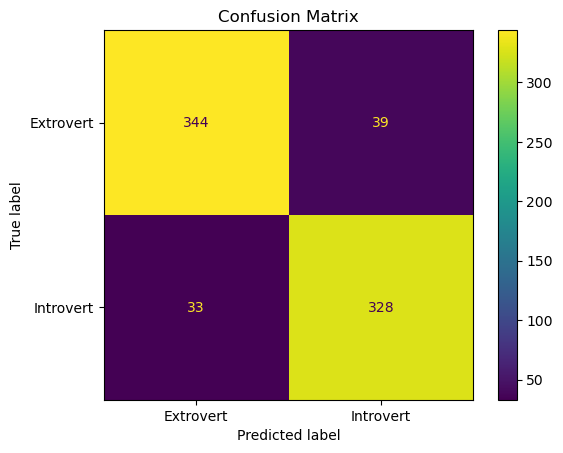

In [13]:
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['Extrovert', 'Introvert'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()